Corinne McCumber\
Professor Andrew Uhe\
IS445 Data Visualization\
1 May 2024
# Final Project: Individual View

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

## 1) Introduction

I originally thought this project would be very different. 

I thought I would be working with Taylor Swift's discography, as a topical reference to the mega-star. I found a dataset on Kaggle that listed all of Taylor Swift's discography along with information such as album title, release dates, song lyrics, artists, producers, and genre tags, and the dataset was listed as CC BY-SA 4.0, where the data can be shared and adapted so long as it is attributed and distributed under the same license as the original. However, the creator of the dataset noted that the data was scraped from genius.com, which is licensed and copyrighted. After messaging the on-call librarian, learning that the copyright librarian was on vacation, and emailing the Scholarly Communication and Publishing department, I got far more information than I bargained for regarding copyright issues. If you'd like to fall down the same rabbit hole that I did, relevant links are below: 

Kaggle dataset: https://www.kaggle.com/datasets/madroscla/taylor-swift-released-song-discography-genius \
Kaggle dataset creator github: https://github.com/madroscla/taylor-swift-discography \
Genius licensing: https://genius.com/static/licensing \
Genius terms of use: https://genius.com/static/terms (expressly "...you agree not to modify, copy, frame, scrape, rent, lease, loan, sell, distribute or create derivative works based on the Service or the Genius Content, in whole or in part, except that the foregoing does not apply to your own User Content (as defined above) that you legally upload to the Service.")

Additionally, some select quotes from my discussion with the Scholarly Communication and Publishing department: \
"There are a couple different issues at play here. First, while it makes sense to be thinking about fair use, unfortunately contracts (such as terms of service) can actually override copyright and forbid fair use ... The Genius terms of service are written in a way that prevent fair use.

To make things even more complicated, however, the Genius terms of service are what are called a “browsewrap” terms of service. Browsewrap agreements are ones where there are terms of service on the site, which state that by using the website you agree to the terms of service. This is in contrast to “clickwrap” agreements, where users have to click something (like “I agree”) to be able to use the site. Courts have commonly found that the browsewrap agreements are not enforceable, since the user doesn’t take any action to affirmatively agree to the terms. In the case of it not being enforceable, then fair use would still be a valid defense. That being said, there is risk involved if you intentionally disregard the terms of service, even if it is a browsewrap, so that might not be something you want to do. 

All of that to say, while it seems like a dataset of lyrics would be a strong argument for transformative fair use, it’s not entirely clear if fair use would apply in this case because of the presence of the terms of service that expressly forbid scraping. Ultimately, the safest route would be to find another dataset to use, given the uncertainties of this one."

After those struggles, I decided that it might be better to find musicians' work I can expressly use.

## 2) Dataset Information and Licensing

### Dataset name:
Track metadata from the Free Music Archive (FMA)
### Found via: 
Library of Congress https://lccn.loc.gov/2018655052
### Downloaded from: 
https://github.com/mdeff/fma \
Direct zip file download for all metadata (only tracks.csv and genres.csv are used here): https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
### License: 
Creative Commons Attribution 4.0 International License (CC BY 4.0, https://creativecommons.org/licenses/by/4.0/), which allows for sharing and adaptation so long as appropriate attribution is given.
### File size, items, description:
Tracks.csv is 254.311 MB. It contains metadata for album, artist, and specific track for the 106,574 tracks in the full FMA dataset (e.g. album date released, album listens, artist bio, artist latitude and longitude, track bit rate, track title, track genre, track listens, etc.). As such, this is a mix of integer, string, and date values. Since metadata is not complete for all tracks contained in the set, I will generally be examining metadata categories that are present for at least 95% of the dataset, discarding those tracks where metadata was not provided. One exception to this is the artist latitude and longitude data, which are only present for 23% of the tracks, but which I will be using in order to have fun with maps.


### Further dataset details: 
From the FMA's README.md: \
"We introduce the Free Music Archive (FMA), an open and easily accessible dataset suitable for evaluating several tasks in MIR \[Music Information Retrieval\], a field concerned with browsing, searching, and organizing large music collections. ... The FMA ... provid\[es\] 917 GiB and 343 days of Creative Commons-licensed audio from 106,574 tracks from 16,341 artists and 14,854 albums, arranged in a hierarchical taxonomy of 161 genres. It provides full-length and high-quality audio, pre-computed features, together with track- and user-level metadata, tags, and free-form text such as biographies."

The full dataset includes categories of metadata (for tracks, genres, features, and audio features) as well as MP3-encoded audio data. This is too large for me to effectiely use, so I narrowed my scope. I am most interested in tracks.csv, which contains "per track metadata such as ID, title, artist, genres, tags and play counts, for all 106,574 tracks." In the paper of the same title as the dataset, which is accessible via https://doi.org/10.48550/arXiv.1612.01840, the authors break down the list of available per-track, per-album, and per-artist metadata by percentage.

The code is listed under the MIT License, which allows any person to "to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software," so long as a copyright notice and the same permission notice are included in the software. The metadata (which is my specific focus for this project) is released under the Creative Commons Attribution 4.0 International License (CC BY 4.0) (https://creativecommons.org/licenses/by/4.0/), which allows for sharing and adaptation so long as appropriate attribution is given.

### Suggested Citation:
@inproceedings{fma_dataset, \
  title = {{FMA}: A Dataset for Music Analysis}, \
  author = {Defferrard, Michaël and Benzi, Kirell and Vandergheynst, Pierre and Bresson, Xavier}, \
  booktitle = {18th International Society for Music Information Retrieval Conference (ISMIR)}, \
  year = {2017}, \
  archiveprefix = {arXiv}, \
  eprint = {1612.01840}, \
  url = \{https://arxiv.org/abs/1612.01840 \}, \
}

## 3) Reading in Dataset

In [2]:
# Display all columns for easier troubleshooting
pd.set_option('display.max_columns', None) 

df = pd.read_csv(r'data/tracks.csv', parse_dates=True, header=[0,1,2], encoding ='utf-8')

# Combine three header rows into one row to avoid MultiIndex issues. 
# Variable k is just the 'track_id' header for column 0 listed in its own separate row, which is reinstated with df.rename.
df.columns = [f'{i}_{j}' for i,j,k in df.columns] 
df.rename(columns={'Unnamed: 0_level_0_Unnamed: 0_level_1': 'track_id'}, inplace=True) 

df.shape

(106574, 53)

In [3]:
df.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,album_title,album_tracks,album_type,artist_active_year_begin,artist_active_year_end,artist_associated_labels,artist_bio,artist_comments,artist_date_created,artist_favorites,artist_id,artist_latitude,artist_location,artist_longitude,artist_members,artist_name,artist_related_projects,artist_tags,artist_website,artist_wikipedia_page,set_split,set_subset,track_bit_rate,track_comments,track_composer,track_date_created,track_date_recorded,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


## 4) Cleaning the dataset

In [4]:
df['album_date_created'].dtypes

dtype('O')

In [5]:
# The dates aren't being read in correctly. 'album_date_created' should be datetime, not an object/text.
date_columns = ['album_date_created', 'album_date_released', 'artist_active_year_begin', 'artist_active_year_end', 'artist_date_created',
                'track_date_created', 'track_date_recorded']

for column_name in date_columns:
    df[column_name] = pd.to_datetime(df[column_name])

In [6]:
df.dtypes

track_id                             int64
album_comments                       int64
album_date_created          datetime64[ns]
album_date_released         datetime64[ns]
album_engineer                      object
album_favorites                      int64
album_id                             int64
album_information                   object
album_listens                        int64
album_producer                      object
album_tags                          object
album_title                         object
album_tracks                         int64
album_type                          object
artist_active_year_begin    datetime64[ns]
artist_active_year_end      datetime64[ns]
artist_associated_labels            object
artist_bio                          object
artist_comments                      int64
artist_date_created         datetime64[ns]
artist_favorites                     int64
artist_id                            int64
artist_latitude                    float64
artist_loca

In [7]:
# To compare the most common words in track title, album title, and artist name, I'll need to make those columns all lowercase.
names_columns = ['album_title', 'artist_name', 'track_title']

for column in names_columns:
    df[column] = df[column].str.lower()

In [8]:
df['track_title'].head()

0               food
1       electric ave
2         this world
3            freeway
4    spiritual level
Name: track_title, dtype: object

In [9]:
# I want to replace the genre id numbers with their written counterparts for easier comparison. Genre id keys are stored in a separate csv file.
genre_df = pd.read_csv('data/genres.csv', header = 0)
genre_df

,genre_id,#tracks,parent,title,top_level
0,1,8693,38,Avant-Garde,38
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
...,...,...,...,...,...
158,1032,60,102,Turkish,2
159,1060,30,46,Tango,2
160,1156,26,130,Fado,2
161,1193,72,763,Christmas,38


In [10]:
dict_replace = genre_df.set_index('genre_id')['title'].to_dict()
# Adding regex to avoid dictionary keys being cut short (e.g. key read as 11 when key is actually 112).
dict_replace = {fr'\b{k}\b':v for k, v in dict_replace.items()}

df['track_genres_all'] = df['track_genres_all'].replace(dict_replace, regex=True)

df['track_genres_all'].tail()

106569                        [Punk, Rock]
106570                        [Punk, Rock]
106571                        [Punk, Rock]
106572                        [Punk, Rock]
106573    [Rockabilly, Pop, Rock, Country]
Name: track_genres_all, dtype: object

## 5) Some actual visualizations

### Album number of tracks vs. date created scatter plot
Is there any relationship between how old an album is and how many tracks are included?

In [11]:
# Looking for 14,854 albums initially per the dataset creators.
album_tracks_df = df.loc[:, ['album_date_created', 'album_id', 'album_tracks']]
album_tracks_df.drop_duplicates(keep='first', inplace=True)
album_tracks_df.shape

(14854, 3)

In [12]:
# album_id is present for 100% of the dataset, album_date_created for 97%, and album_tracks for 96%, so I'll be dropping the NaN values. 
# Expecting ~14,260 albums
album_tracks_df.dropna(inplace=True)
album_tracks_df.shape

(14395, 3)

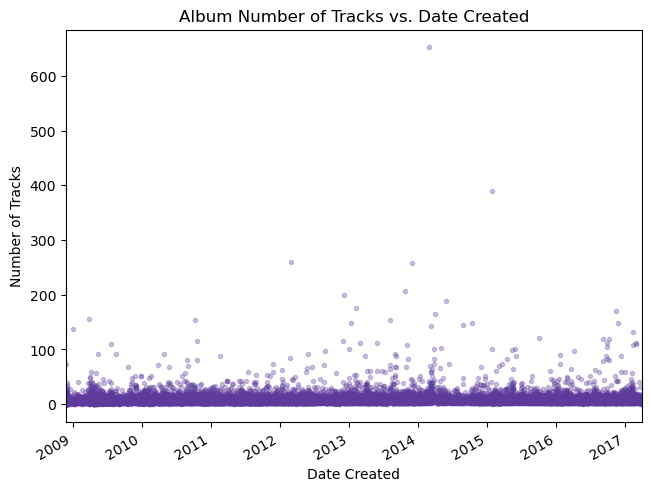

In [13]:
fig1, ax1 = plt.subplots(layout='constrained')

ax1.scatter(album_tracks_df['album_date_created'], album_tracks_df['album_tracks'], marker='.', color='#5D3A9B', alpha=0.3)
ax1.set_title('Album Number of Tracks vs. Date Created')
ax1.set_xlim([album_tracks_df['album_date_created'].min(), album_tracks_df['album_date_created'].max()])
ax1.set_xlabel('Date Created')
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
ax1.set_ylabel('Number of Tracks')

plt.show()

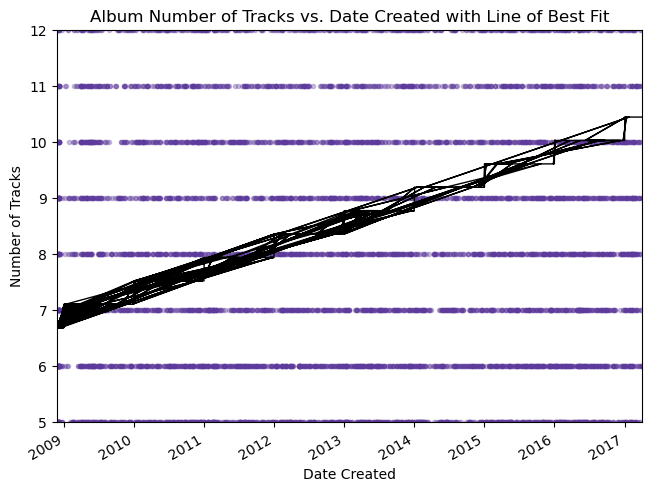

In [14]:
# Trying and failing to make a line of best fit for the tracks data. Something is going wrong with the disjointed year data (x.dt.year) being provided.
fig2, ax2 = plt.subplots(layout='constrained')

x = album_tracks_df['album_date_created']
y = album_tracks_df['album_tracks']

ax2.scatter(x, y, marker='.', color='#5D3A9B', alpha=0.3)
a, b = np.polyfit(x.dt.year, y, 1)
plt.plot(x, a*x.dt.year+b, color='#000000', linestyle='-', linewidth=1)

ax2.set_title('Album Number of Tracks vs. Date Created with Line of Best Fit')
ax2.set_xlim([album_tracks_df['album_date_created'].min(), album_tracks_df['album_date_created'].max()])
ax2.set_xlabel('Date Created')
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')
ax2.set_ylabel('Number of Tracks')
ax2.set_ylim(5,12)

plt.show()

### Number of album tracks histogram
How many tracks do most albums have?

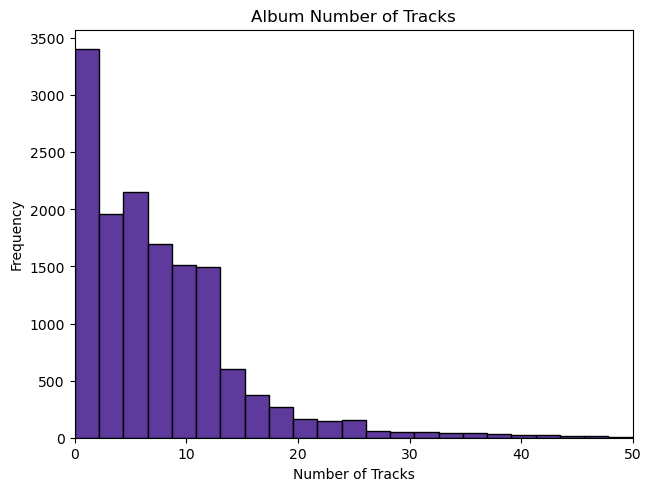

In [15]:
fig3, ax3 = plt.subplots(layout='constrained')

plt.hist(album_tracks_df['album_tracks'], bins=300, color='#5D3A9B', edgecolor='#000000')
plt.title('Album Number of Tracks')
ax3.set_xlabel('Number of Tracks')
ax3.set_ylabel('Frequency')
ax3.set_xlim(0,50)

plt.show()
# Shows that the vast majority of albums have 10 or fewer songs! Purposefully cut off albums with >=50 tracks as outliers.

### Album listens vs date created scatter plot
Do older albums have more listens?

In [16]:
# Again looking for 14,854 albums initially per the dataset creators.
album_listens_df = df.loc[:, ['album_date_created', 'album_id', 'album_listens']]
album_listens_df.drop_duplicates(keep='first', inplace=True)
album_listens_df.shape

(14854, 3)

In [17]:
# album_id is present for 100% of the dataset, album_date_created for 97%, and album_listens for 97%, so I'll be dropping the NaN values.
# Expecting ~14408 albums
album_listens_df.dropna(inplace=True)
album_listens_df.shape

(14395, 3)

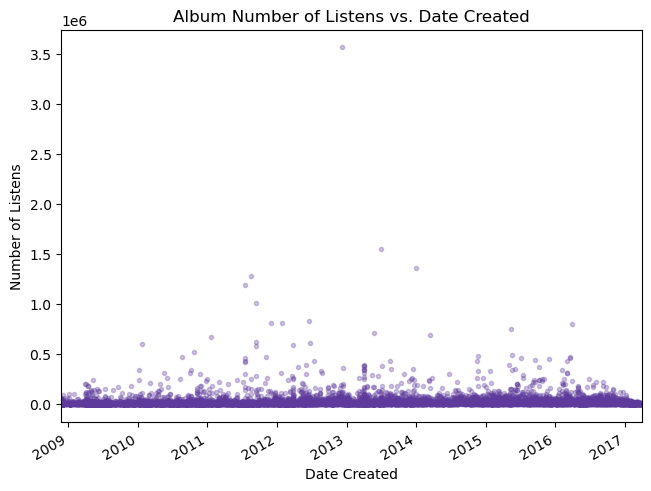

In [18]:
# Do older albums in this dataset get more listens? 
fig4, ax4 = plt.subplots(layout='constrained')

ax4.scatter(album_listens_df['album_date_created'], album_listens_df['album_listens'], marker='.', color='#5D3A9B', alpha=0.3)
ax4.set_title('Album Number of Listens vs. Date Created')
ax4.set_xlim([album_listens_df['album_date_created'].min(), album_listens_df['album_date_created'].max()])
ax4.set_xlabel('Date Created')
plt.setp(ax4.get_xticklabels(), rotation=30, horizontalalignment='right')
ax4.set_ylabel('Number of Listens')

plt.show()

### Most common words in artist name
How do artists present themselves, and what can we learn about artist demographics?

In [19]:
artist_name_df = df.loc[:, ['artist_id', 'artist_name']]
artist_name_df.head()

,artist_id,artist_name
0,1,awol
1,1,awol
2,1,awol
3,6,kurt vile
4,4,nicky cook


In [20]:
# Artist_id and artist_name are both available for 100% of the dataset. Dropping repeat artists, expecting 16,341 artists total.
artist_name_df.drop_duplicates(keep='first', inplace=True)
artist_name_df.shape

(16341, 2)

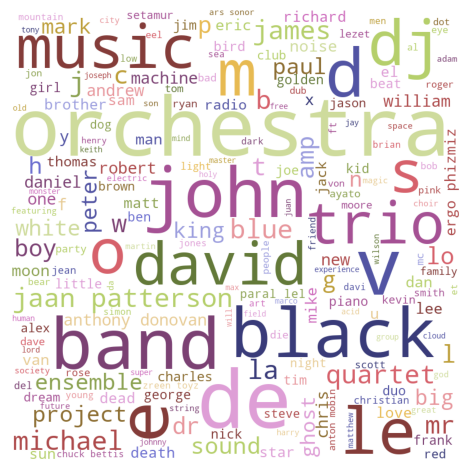

In [21]:
name_words = ''
stopwords = set(STOPWORDS)
stopwords.add('feat')

for value in artist_name_df['artist_name']:
    tokens = value.split()
    name_words += ' '.join(tokens)+' '

wordcloud = WordCloud(
    width = 800, 
    height = 800,
    background_color ='white',
    stopwords = stopwords,
    colormap = 'tab20b',
    min_font_size = 10).generate(name_words)

fig6, ax6 = plt.subplots(layout='tight')
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

So "John de le Black Orchestra Band" is probably already taken! There also seem to be many more masculine names on this list.

### Basic latitude and longitude visualization
Where are artists located? 

In [22]:
# Dropping repeat artists, looking for 16,341 artists total.
location_df = df.loc[:, ['artist_id', 'artist_latitude', 'artist_longitude']]
location_df.drop_duplicates(subset='artist_id', keep='first', inplace=True)
location_df.shape

(16341, 3)

In [23]:
# artist_latitude and artist_longitude are only available for 23% of the artist dataset. Dropping NaN values, expecting output of ~3,758.
location_df.dropna(inplace=True)
location_df.shape

(3836, 3)

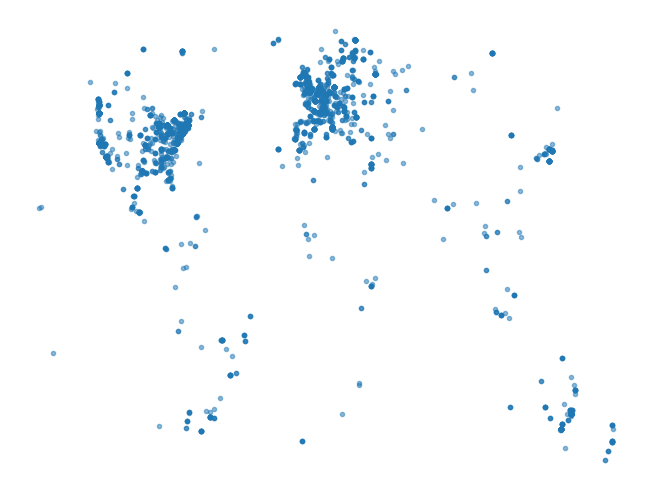

In [24]:
# What is the geographic distribution of artists?
fig7, ax7 = plt.subplots(layout='constrained')

ax7.scatter(location_df['artist_longitude'], 
           location_df['artist_latitude'],
          marker = '.',
          alpha = 0.5)
plt.axis("off")

plt.show()

Seems like we're over-represented in the US and Europe compared to the rest of the world.